5.878764675855028
0.5639996173941942
0.5606419246493655


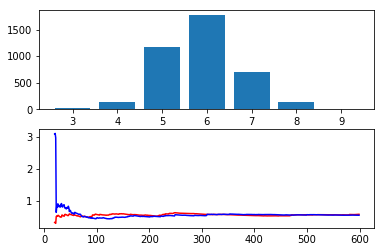

0.005077193465003498
1.0
Lasso with lambda: 0.01 . Error: 0.4368839962458545
Ridge with lambda: 0.01 . Error: 0.4232324340110147
Lasso with lambda: 0.1 . Error: 0.4979340120708281
Ridge with lambda: 0.1 . Error: 0.4231609320910237
Lasso with lambda: 1 . Error: 0.632507106672909
Ridge with lambda: 1 . Error: 0.4226232114907137
Lasso with lambda: 10 . Error: 0.632507106672909
Ridge with lambda: 10 . Error: 0.4215659065507037
Lasso with lambda: 100 . Error: 0.632507106672909
Ridge with lambda: 100 . Error: 0.42568302524812046
Ridge with lambda 10 has lowest error.


In [60]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


def standard_train_data(arr):
    a,b = np.shape(arr)
    c,d = np.ones(b), np.ones(b)
    for i in range(0,b):
        c[i],d[i] = np.mean(arr[:,i]), np.std(arr[:,i])
        arr[:,i] -= np.mean(arr[:,i])
        arr[:,i] /= np.std(arr[:,i])
    return (c, d)


def standard_test_data(arr, mean, std):
    a,b = np.shape(arr)
    for i in range(0,b):
        arr[:,i] -= mean[i]
        arr[:,i] /= std[i]
    return arr

def center_data(arr):
    arr -= np.mean(arr)
    return arr

def cal_err(arr1, arr2):
    b = np.shape(arr1)[0]
    arr = arr1 - arr2
    ret = 0
    for i in range(0,b):
        ret += arr[i]**2
    ret /= m
    return ret



plt.figure(1)
plt.subplot(211)
X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

y_dist = np.array(collections.Counter(y_train).most_common())
plt.bar(y_dist[:,0], y_dist[:,1])

baseline_MSE = np.average(y_dist[:,0], weights=y_dist[:,1])
print(baseline_MSE)
mean, std = standard_train_data(X_train)
m, n = np.shape(X_train)
X_train = np.hstack((np.ones((m,1), dtype=np.float64), X_train))
standard_test_data(X_test, mean, std)
m,n = np.shape(X_test)
X_test = np.hstack((np.ones((m,1), dtype=np.float64), X_test))

center_data(y_train)
center_data(y_test)

model_param = np.linalg.inv(np.transpose(X_train)@X_train)@np.transpose(X_train)@y_train
y_pred_train = X_train@model_param
k = y_pred_train-y_train

m = np.shape(k)[0]
part3_MSE_train = 0
for i in range(0,m):
    part3_MSE_train += k[i]**2
part3_MSE_train /= m
print(part3_MSE_train)

y_pred_test = X_test@model_param

k = y_pred_test-y_test
m = np.shape(k)[0]
part3_MSE_test = 0
for i in range(0,m):
    part3_MSE_test += k[i]**2
part3_MSE_test /= m
print(part3_MSE_test)

k = np.arange(20,600)

train_err = np.ones(580)
test_err = np.ones(580)

for n in k:
    acc = 0
    X_train_n = X_train[0:n,:]
    y_train_n = y_train[0:n]
    
    X_test_n = X_test[0:n,:]
    y_test_n = y_test[0:n]
    
    model_param =  np.linalg.inv(np.transpose(X_train_n)@X_train_n)@np.transpose(X_train_n)@y_train_n
    y_pred_train = X_train_n@model_param

    k1 = y_pred_train - y_train_n
    for j in range(0,n):
        acc += k1[j]**2
    train_err[n-20] = acc/n
    
    
    y_pred_test = X_test_n@model_param
    k1 = y_pred_test - y_test_n
    acc = 0
    for j in range(0,n):
        acc+=k1[j]**2
    test_err[n-20] = acc/n

plt.subplot(212)
plt.plot(k, train_err, 'r', k, test_err, 'b')
plt.show()
    
    
#Optional part
lambda_list = [0.01,0.1,1,10,100]
N_train = int(0.8*N_train)
X_train_opt = X_train[:N_train]
X_valid_opt = X_train[N_train:]
y_train_opt = y_train[:N_train]
y_valid_opt = y_train[N_train:]
poly = PolynomialFeatures(degree=2)
X_train_opt = poly.fit_transform(X_train_opt)
X_valid_opt = poly.fit_transform(X_valid_opt)
scaler = StandardScaler()
scaler.fit_transform(X_train_opt)
scaler.fit_transform(X_valid_opt)
for l in lambda_list:
    lasso = linear_model.Lasso(alpha=l)
    lasso.fit(X_train_opt, y_train_opt)
    y_pred_opt = lasso.predict(X_valid_opt)
    print("Lasso with lambda: " + str(l) + " . Error: " + str(cal_err(y_pred_opt, y_valid_opt)))
    ridge = linear_model.Ridge(alpha=l)
    ridge.fit(X_train_opt, y_train_opt)
    y_pred_opt = ridge.predict(X_valid_opt)
    print("Ridge with lambda: " + str(l) + " . Error: " + str(cal_err(y_pred_opt, y_valid_opt)))

print("Ridge with lambda 10 has lowest error.")
    